<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [6]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




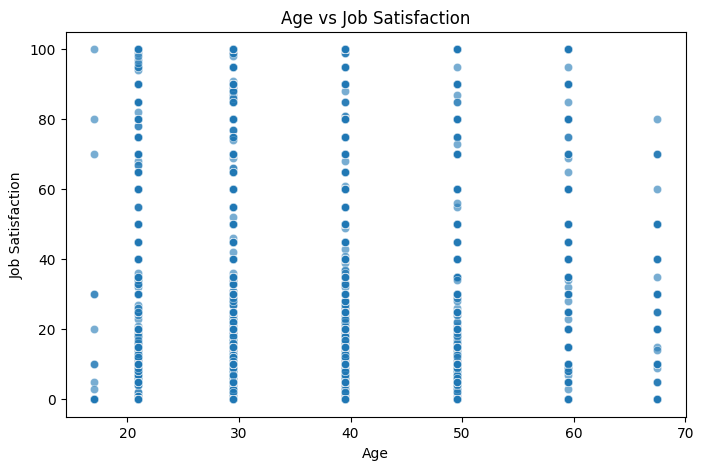

In [7]:
# Map Age to numeric midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67.5,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_mapping)

# Convert Work Experience to numeric
df['YearsCodePro_num'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Remove missing values for relevant columns
df_clean = df.dropna(subset=['Age_num', 'JobSatPoints_6', 'ConvertedCompYearly', 'YearsCodePro_num'])

# ----------------------------
# Task 1: Basic Scatter Plots
# ----------------------------

# 1. Age vs Job Satisfaction
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='Age_num', y='JobSatPoints_6', alpha=0.6)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


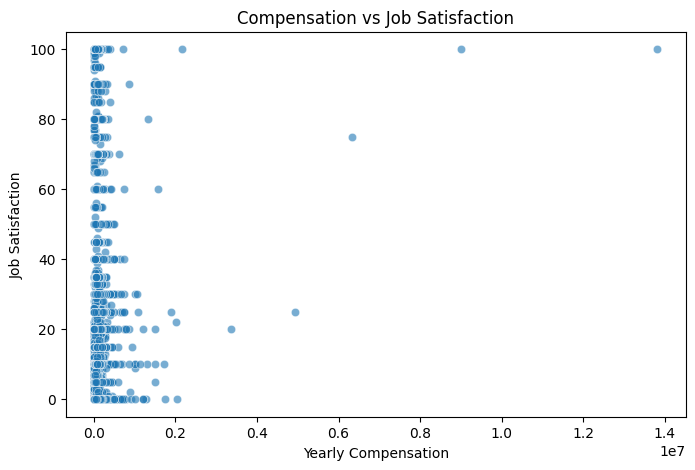

In [8]:
# 2. Compensation vs Job Satisfaction
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.6)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.show()



### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


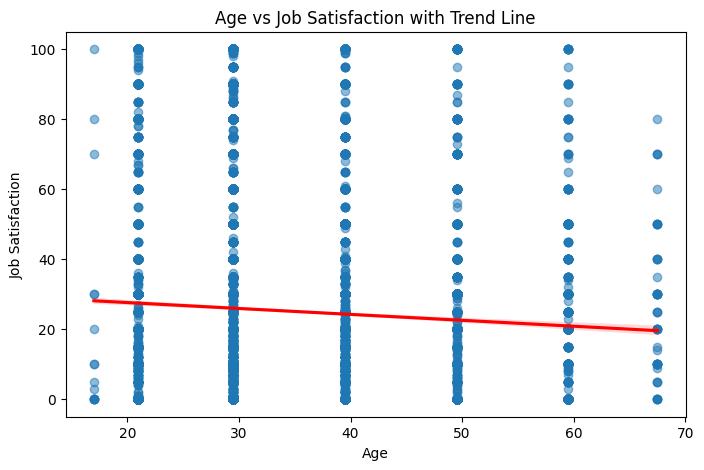

In [9]:
# Task 2: Enhanced Scatter Plots
# ----------------------------

# 1. Age vs Job Satisfaction with Regression Line
plt.figure(figsize=(8,5))
sns.regplot(data=df_clean, x='Age_num', y='JobSatPoints_6', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Age vs Job Satisfaction with Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


/tmp/ipykernel_1746/2409875671.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeGroup'] = df['Age'].map(age_group_mapping)


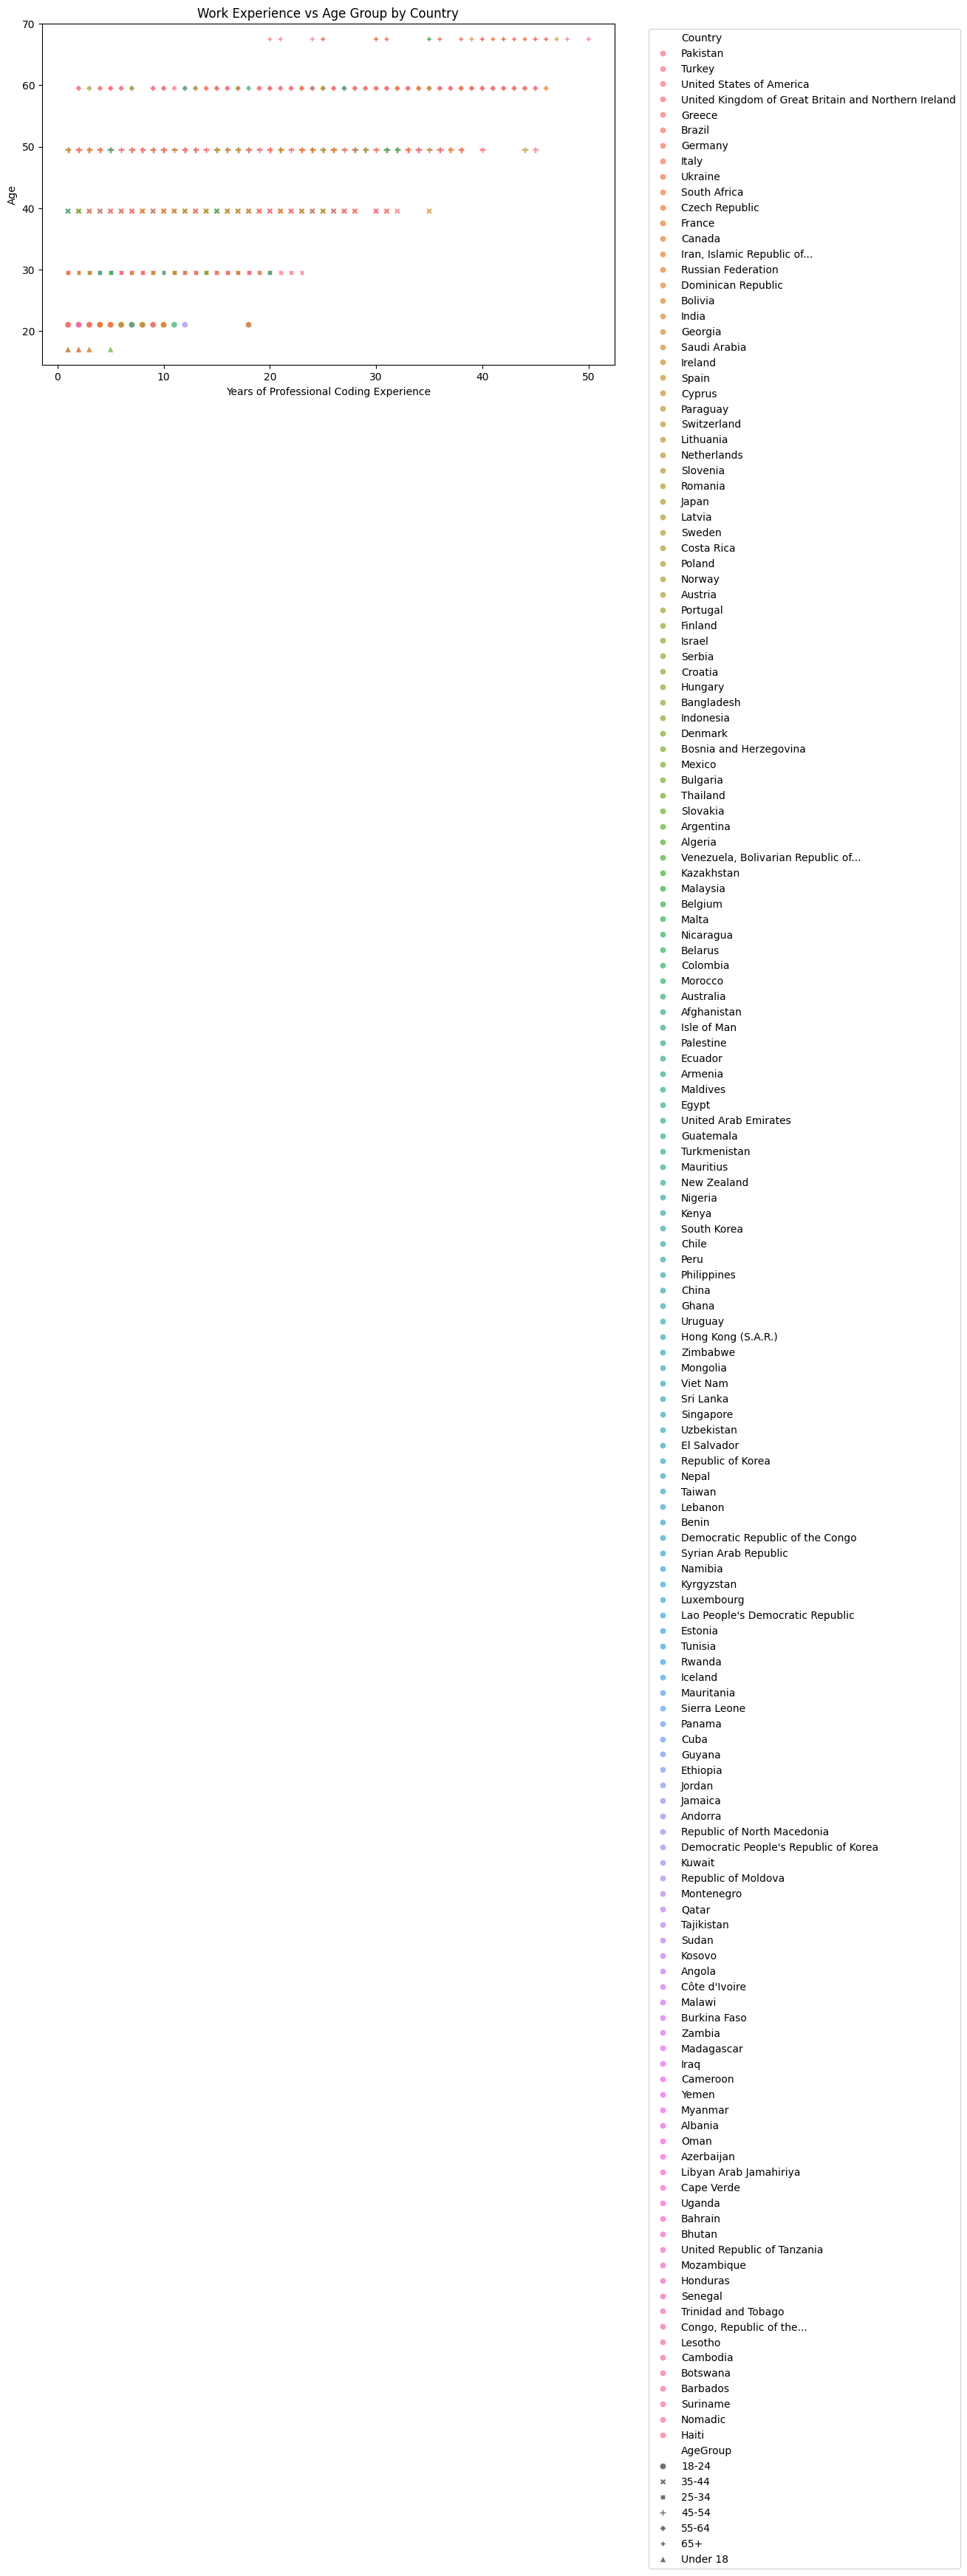

In [10]:
# 2. Work Experience vs Age Group by Country
# Map Age categories back to groups for plotting
age_group_mapping = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': 'Unknown'
}
df_clean['AgeGroup'] = df['Age'].map(age_group_mapping)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='YearsCodePro_num', y='Age_num', hue='Country', style='AgeGroup', alpha=0.7)
plt.title('Work Experience vs Age Group by Country')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


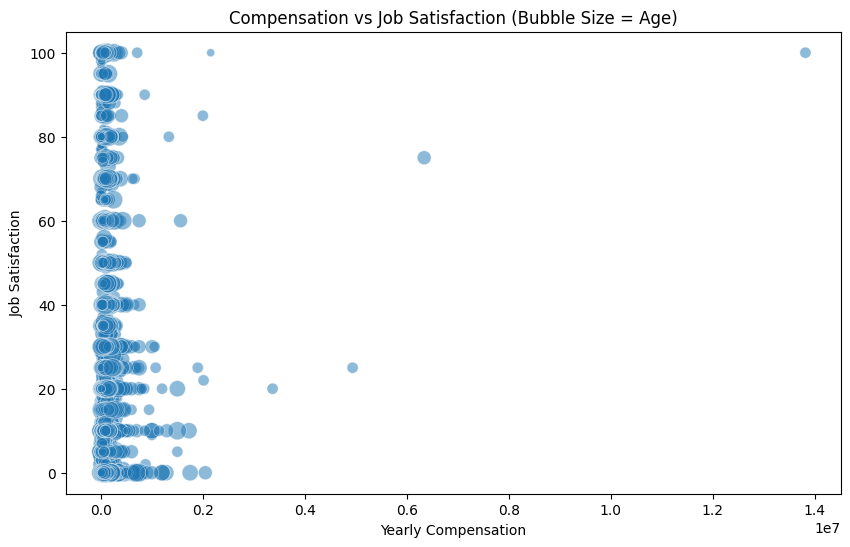

In [11]:
# Convert Age to numeric midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67.5,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_mapping)

# Clean the data for relevant columns
df_clean = df.dropna(subset=['Age_num', 'JobSatPoints_6', 'ConvertedCompYearly', 'LanguageHaveWorkedWith'])

# ----------------------------
# 1. Bubble Plot: Compensation vs Job Satisfaction with Age as Bubble Size
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean, 
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    size='Age_num', 
    sizes=(20, 200), 
    alpha=0.5,
    legend=False
)
plt.title('Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


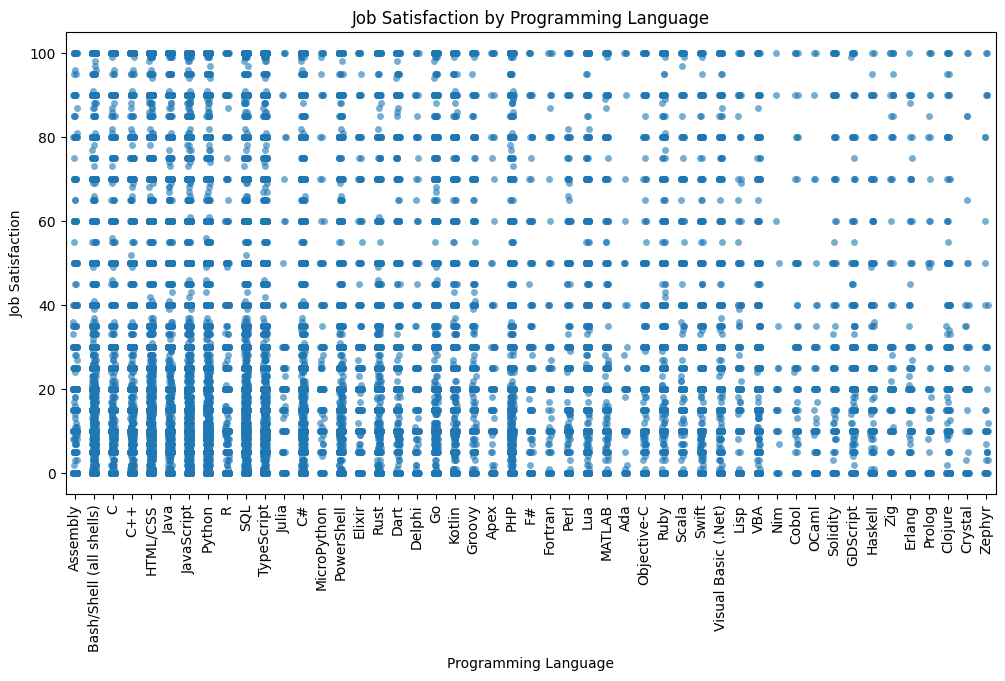

In [12]:
# ----------------------------
# 2. Scatter Plot: Programming Languages vs Job Satisfaction
# Explode multiple languages into separate rows
df_lang = df_clean.assign(Language=df_clean['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

plt.figure(figsize=(12,6))
sns.stripplot(
    data=df_lang, 
    x='Language', 
    y='JobSatPoints_6', 
    jitter=True, 
    alpha=0.6
)
plt.xticks(rotation=90)
plt.title('Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction')
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


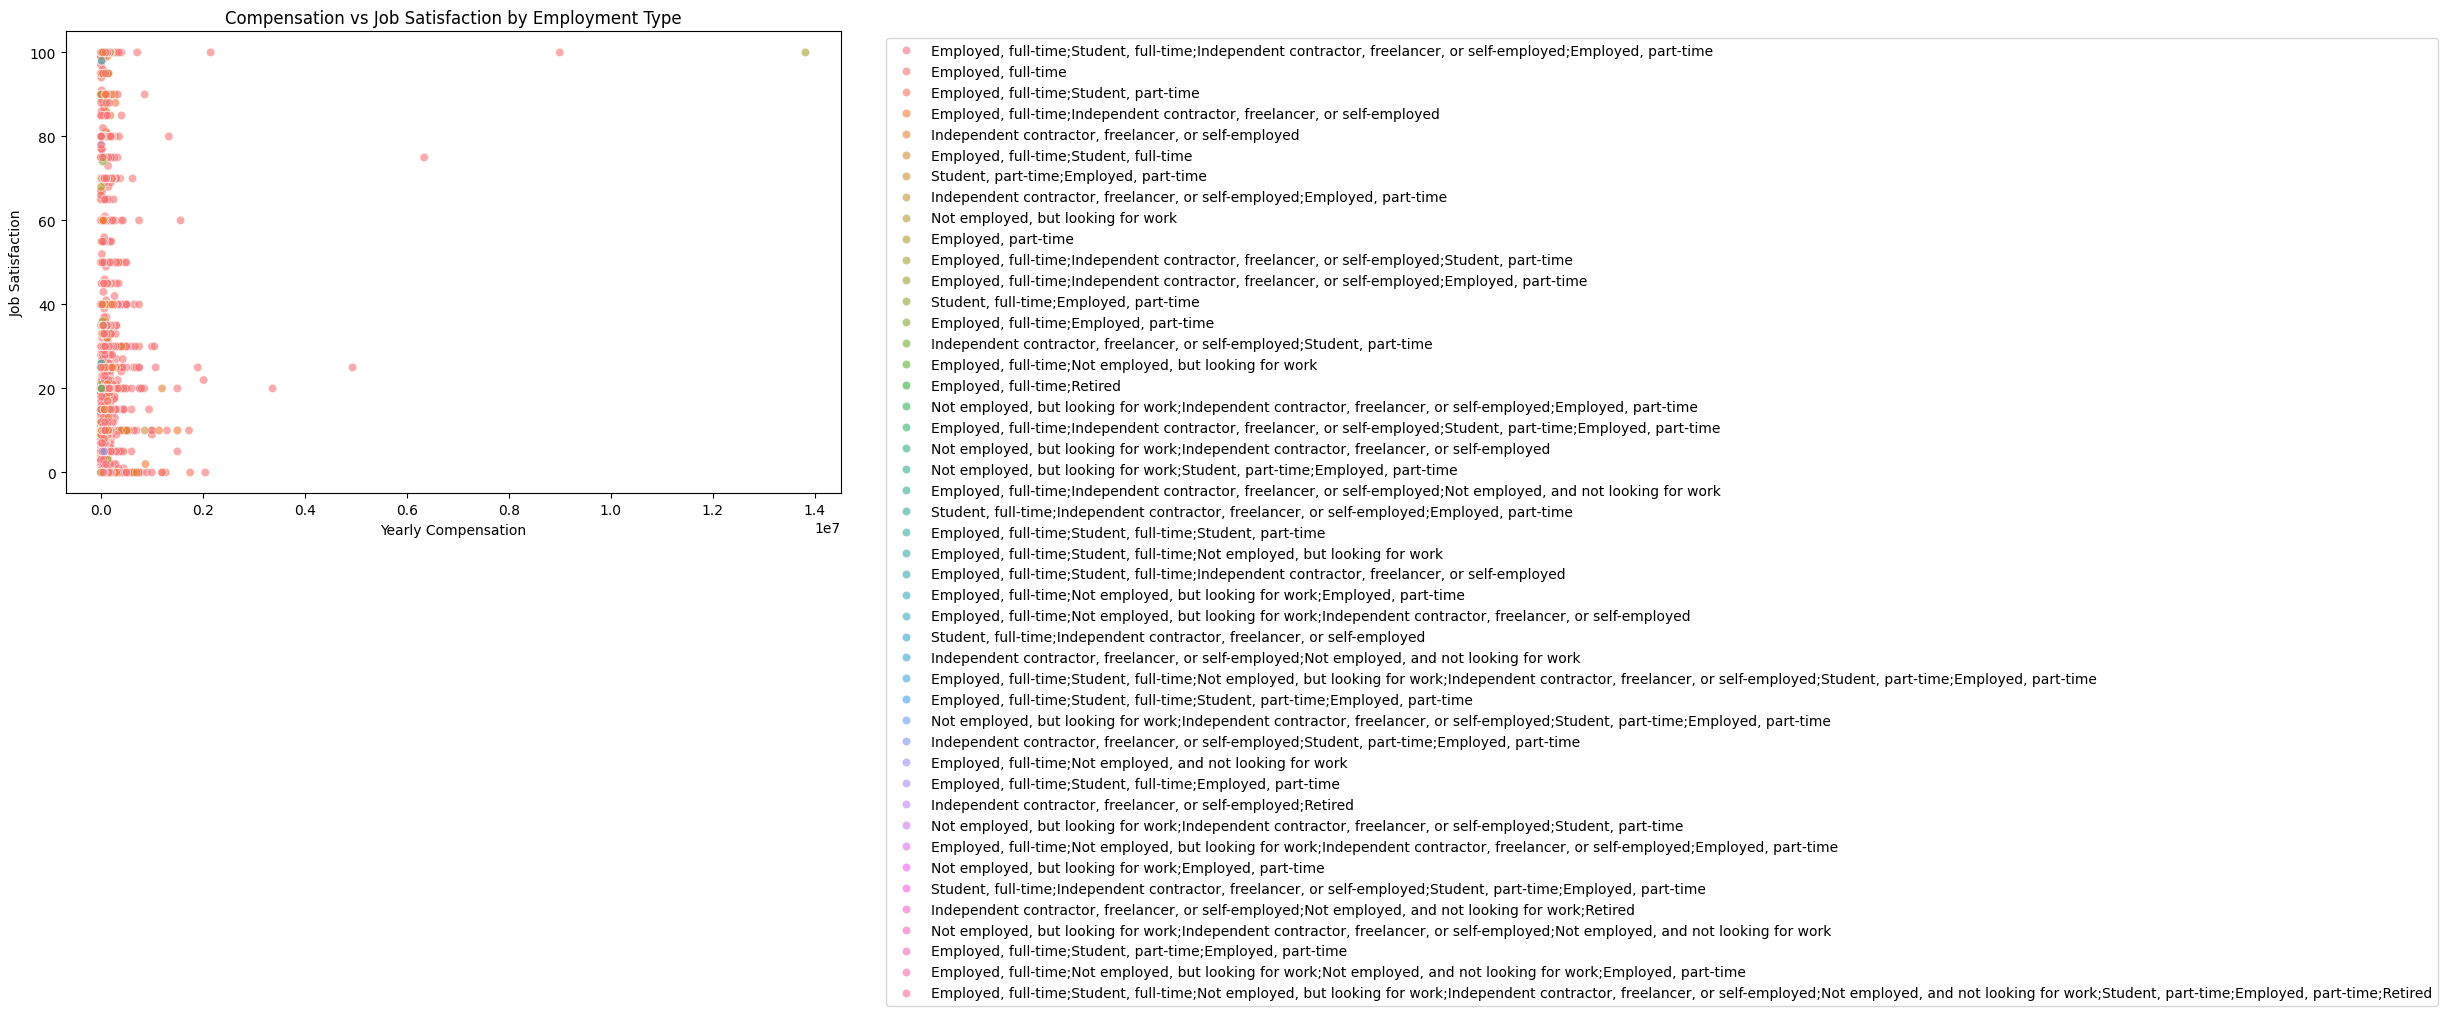

In [13]:
# Convert Age to numeric midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 67.5,
    'Prefer not to say': None
}
df['Age_num'] = df['Age'].map(age_mapping)

# Convert YearsCodePro to numeric
df['YearsCodePro_num'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create Age Groups for plotting
age_group_mapping = {
    'Under 18 years old': 'Under 18',
    '18-24 years old': '18-24',
    '25-34 years old': '25-34',
    '35-44 years old': '35-44',
    '45-54 years old': '45-54',
    '55-64 years old': '55-64',
    '65 years or older': '65+',
    'Prefer not to say': 'Unknown'
}
df['AgeGroup'] = df['Age'].map(age_group_mapping)

# Clean data for relevant columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment', 'YearsCodePro_num', 'AgeGroup', 'Country'])

# ----------------------------
# 1. Compensation vs Job Satisfaction by Employment Type
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_clean, 
    x='ConvertedCompYearly', 
    y='JobSatPoints_6', 
    hue='Employment', 
    alpha=0.6
)
plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


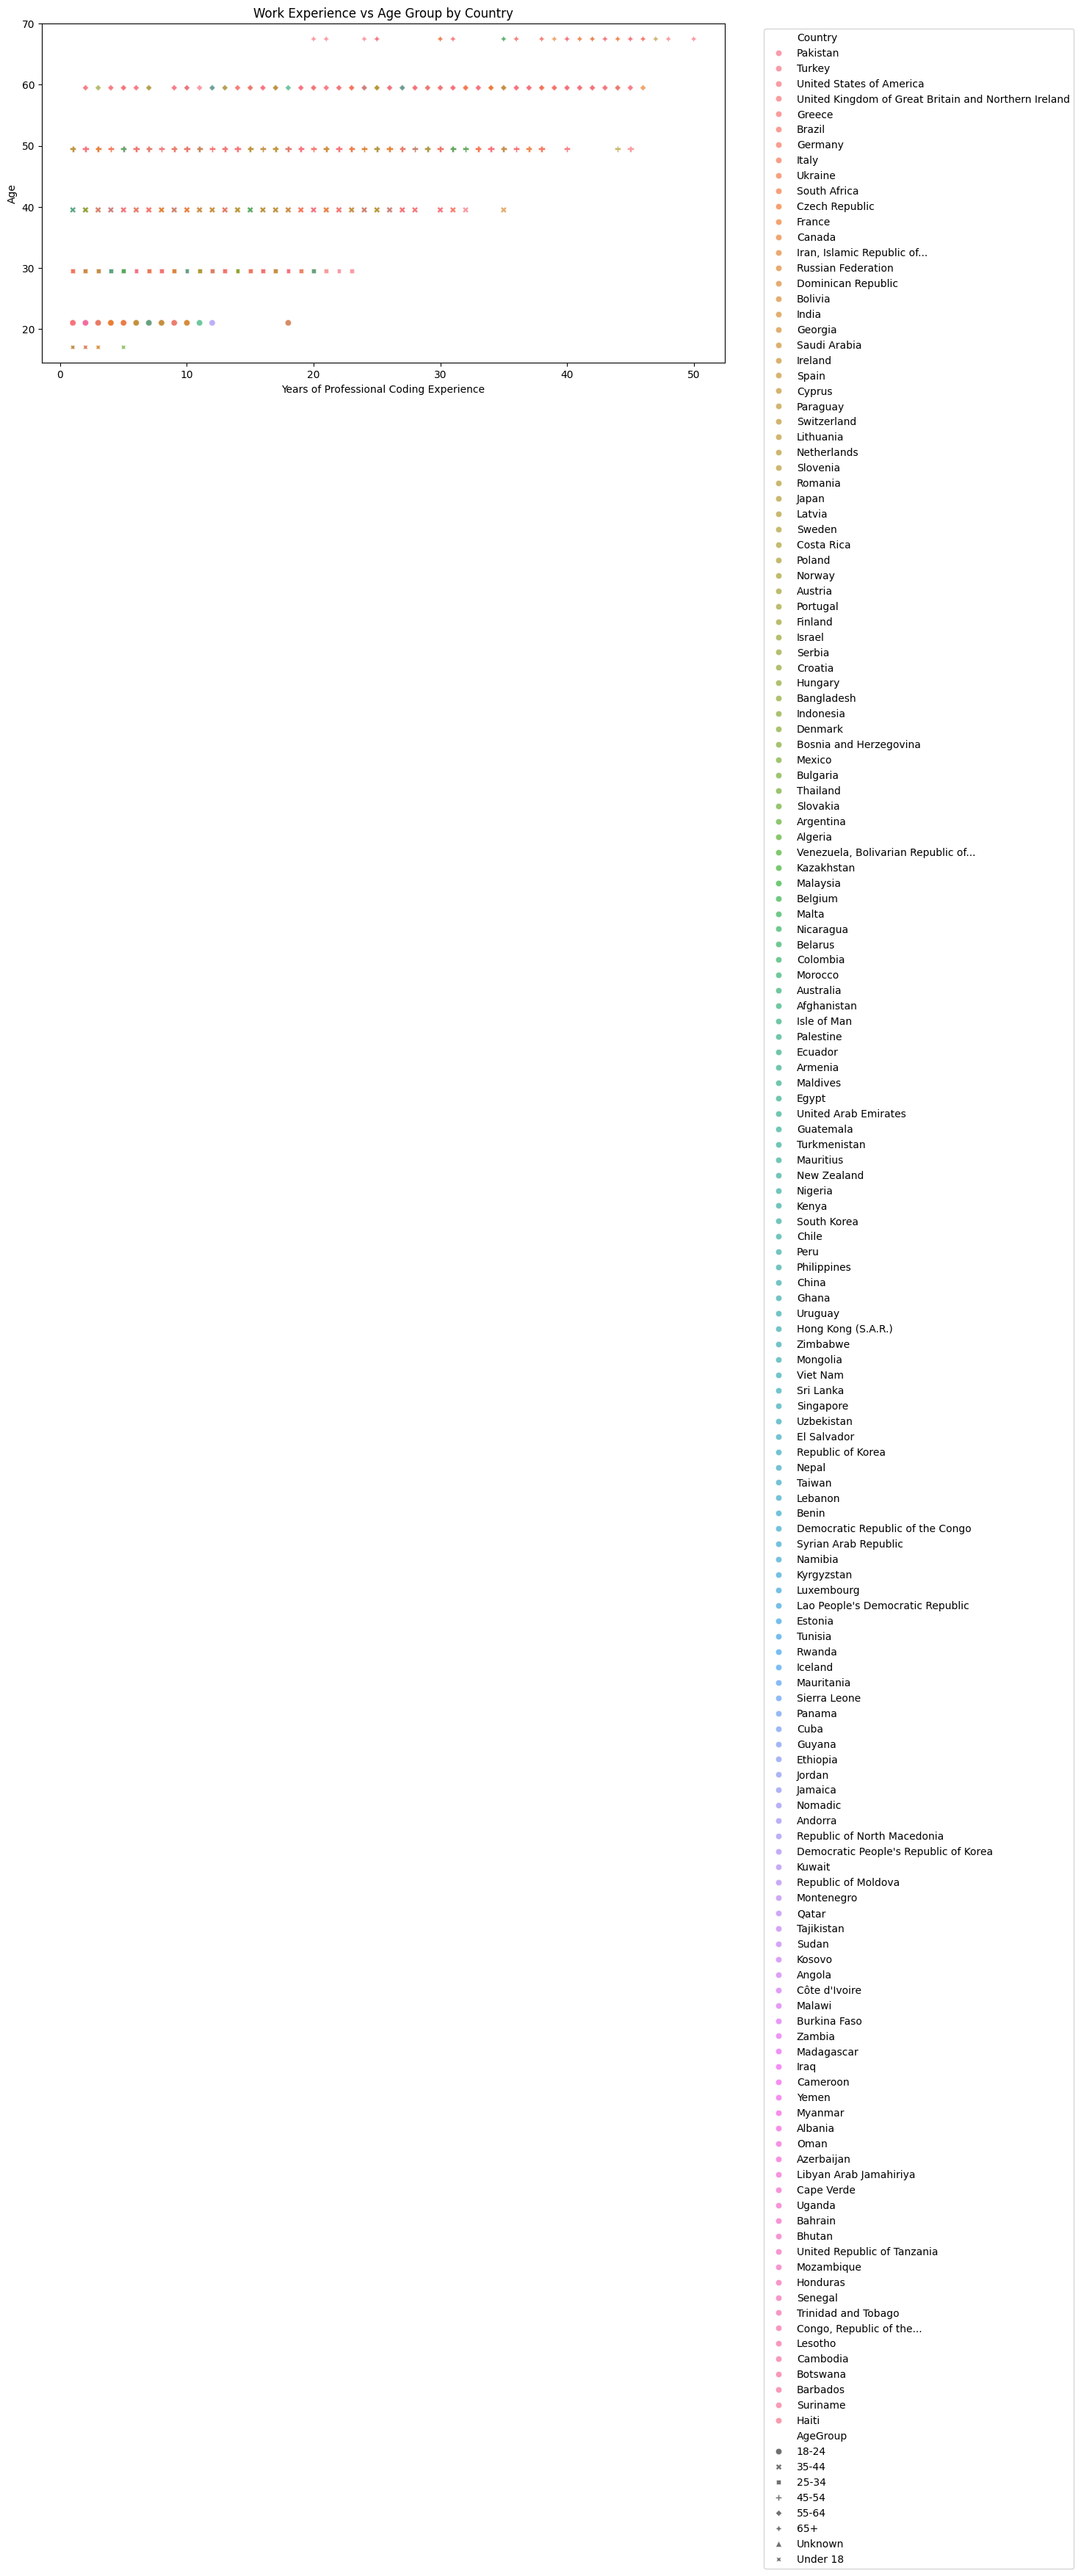

In [14]:
# ----------------------------
# 2. Work Experience vs Age Group by Country
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_clean,
    x='YearsCodePro_num',
    y='Age_num',
    hue='Country',
    style='AgeGroup',
    alpha=0.7
)
plt.title('Work Experience vs Age Group by Country')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
